In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
import math as math


In [2]:
path = "../input/flight-take-off-data-jfk-airport/M1_final.csv"
data = pd.read_csv(path)

In [3]:
data.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
from sklearn import preprocessing


In [5]:
data['Condition'].unique()

array(['Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy',
       'Mostly Cloudy', 'Cloudy', 'Light Rain', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Fog / Windy', 'Light Drizzle / Windy', 'Rain / Windy',
       'Drizzle and Fog', 'Snow', 'Heavy Rain / Windy'], dtype=object)

In [6]:
label_encoder=preprocessing.LabelEncoder()
label_data=data
label_data['Condition']=label_encoder.fit_transform(label_data['Condition'])
label_data['Condition'].unique()

array([ 4,  3, 13, 18, 16,  0, 12, 17, 19, 15,  1,  9, 20,  7,  5, 23, 11,
       14, 24,  6, 10, 21,  2, 22,  8])

In [7]:
label_data['Wind']=str(label_data['Wind'])
label_data['Wind']=label_encoder.fit_transform(label_data['Wind'])


In [8]:
label_data=label_data.drop(['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER'],axis=1)
data.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,0,25,38,29.86,4,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,0,25,38,29.86,4,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,0,25,38,29.86,4,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,0,25,38,29.86,4,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,0,24,35,29.91,4,9,17,13


In [9]:
label_data=label_data.drop(['TAIL_NUM'],axis=1)
label_data['DEST']=label_encoder.fit_transform(label_data['DEST'])
data.head(5)
label_encoding={}
hot_encoding={}

In [10]:
X=label_data.iloc[:,:17] #input varibles
Y=label_data.iloc[:,-1]  #output varibles
Y.head(5)

0    14
1    15
2    22
3    12
4    13
Name: TAXI_OUT, dtype: int64

In [11]:
"Spliting the data set"
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.1, random_state=0)  

In [12]:
"Scaling the data "
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train) 
x_test= st_x.transform(x_test)   

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
"Applying linear regression"
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)


LinearRegression()

In [15]:
"Getting the predicted value and calucaling cost function"
Y_pred=linear_regressor.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_linear =math.sqrt(mean_squared_error(y_test, Y_pred))
print(rmse_linear)

6.6126707439580015


In [16]:
print(linear_regressor.score(x_test, y_test))

0.08246446580400146


In [17]:
ridgeReg = Ridge(alpha=0.01, normalize=True)

ridgeReg.fit(x_train,y_train)

y_pred_ridge = ridgeReg.predict(x_test)

In [18]:
rmse_ridge=math.sqrt(mean_squared_error(y_test,y_pred_ridge))
print(rmse_ridge)

6.6174272604977675


In [19]:
from sklearn.linear_model import Lasso
lassoreg=Lasso(alpha=0.01,normalize=True)

In [20]:
lassoreg.fit(x_train,y_train)
y_pred_lasso=lassoreg.predict(x_test)
rmse_lasso=math.sqrt(mean_squared_error(y_test,y_pred_lasso))
print(rmse_lasso)

6.903781767104768


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [23]:
rmse_knn=math.sqrt(mean_squared_error(y_test,y_pred_knn))
print(rmse_knn)

8.377086159225293


In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)

SVC(random_state=1)

In [25]:
y_pred_svc=classifier.predict(x_test)
rmse_svc=math.sqrt(mean_squared_error(y_pred_svc,y_test))
print(rmse_svc)

7.785063725511221


In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred_nb=model.predict(x_test)
rmse_nb=math.sqrt(mean_squared_error(y_test,y_pred_nb))
print(rmse_nb)

8.827438140374444


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_pred_clf=clf.predict(x_test)
rmse_clf=math.sqrt(mean_squared_error(y_test,y_pred_clf))
print(rmse_clf)

7.3990312024083496


In [28]:
models={'Linear reg','ridge','lasso','KNN','SVC','navier bayes','RandomForest'}
label_encoding={rmse_linear,rmse_ridge,rmse_lasso,rmse_knn,rmse_svc,rmse_nb,rmse_clf}
print(label_encoding)

{6.903781767104768, 7.785063725511221, 8.377086159225293, 6.6126707439580015, 6.6174272604977675, 8.827438140374444, 7.3990312024083496}


In [29]:
from sklearn.preprocessing import OneHotEncoder
hot_data=data


In [30]:
X_OE = pd.get_dummies(X, columns=[ 'DEST', 'Dew Point', 'Wind', 'Condition'])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_OE,Y, test_size = 0.1, random_state =10)

In [32]:
linear_regressor.fit(x_train,y_train)
y_pred_linear=linear_regressor.predict(x_test)
rmse_linear=math.sqrt(mean_squared_error(y_pred_linear,y_test))
print(rmse_linear)


6.621639062440641


In [33]:
lassoreg.fit(x_train,y_train)
y_pred_lasso=lassoreg.predict(x_test)
rmse_lasso=math.sqrt(mean_squared_error(y_test,y_pred_lasso))
print(rmse_lasso)

7.088618612382422


In [34]:
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
rmse_knn=math.sqrt(mean_squared_error(y_test,y_pred_knn))
print(rmse_knn)

8.70379642294687


In [35]:
classifier.fit(x_train,y_train)
y_pred_svc=classifier.predict(x_test)
rmse_svc=math.sqrt(mean_squared_error(y_pred_svc,y_test))
print(rmse_svc)

8.629328008234408


In [36]:
model.fit(x_train,y_train)
y_pred_nb=model.predict(x_test)
rmse_nb=math.sqrt(mean_squared_error(y_test,y_pred_nb))
print(rmse_nb)

15.702152683299827


In [37]:
clf.fit(x_train,y_train)

y_pred_clf=clf.predict(x_test)
rmse_clf=math.sqrt(mean_squared_error(y_test,y_pred_clf))
print(rmse_clf)

7.6215116137337855


In [38]:
hot_encoding=[rmse_linear,rmse_ridge,rmse_lasso,rmse_knn,rmse_svc,rmse_nb,rmse_clf]
print(hot_encoding)

[6.621639062440641, 6.6174272604977675, 7.088618612382422, 8.70379642294687, 8.629328008234408, 15.702152683299827, 7.6215116137337855]


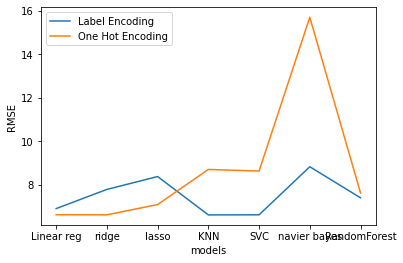

In [39]:
array1 = np.array(list(label_encoding))
array2 = np.array(list(hot_encoding))
models=["Linear reg","ridge","lasso","KNN","SVC","navier bayes","RandomForest"]
#print(array1.size)
#print(array1)
plt.plot(models,array1)
plt.plot(models,array2)

plt.legend(["Label Encoding","One Hot Encoding"])

plt.xlabel("models")
plt.ylabel("RMSE")
plt.show()
